# Food loss and waste database

The database was downloaded from the website of the Food and Agriculture Organization of the United Nations [website](https://www.fao.org/platform-food-loss-waste/flw-data/en/).

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [169]:
# Locating the file
HOME = Path() / '../'
FAO = HOME / 'food-waste-dataset' / 'fao'
DATA = FAO / 'food-loss-waste' / 'data-edited.csv'
df = pd.read_csv(DATA)

In [170]:
# Reading the columns
print(f'There are {len(df.columns)} columns in the database:')
for c in df.columns:
    print('->', c)

There are 18 columns in the database:
-> m49_code
-> country
-> region
-> cpc_code
-> commodity
-> year
-> loss_percentage
-> loss_percentage_original
-> loss_quantity
-> activity
-> food_supply_stage
-> treatment
-> cause_of_loss
-> sample_size
-> method_data_collection
-> reference
-> url
-> notes


In [171]:
# Reading the areas (regions)
regions = df['region'].unique()
print(f'There are {len(regions)} different regions in the dataset:')
for c in regions:
    print('->', c)

There are 144 different regions in the dataset:
-> nan
-> Kandal Province, and wholesalers and retailers in wet markets in the capital of Phnom Penh, about 35 km apar
-> North Patagonia Region
-> Beijing
-> Dingxi Prefecture  in Gansu
-> Beijing, Xinfadi and Jinxiudadi
-> Xiasha Town
-> Shandong Province
-> Fujian Province
-> Daxing, Tongxian, and Yanqing
-> Cixi county
-> Xiasha town
-> Daxing, Tongxian, and Yanqing counties, which are satellite towns of Beijing, and in Jixian County of Hebei Province, which is a suburb very close to Beijing
-> Jiangan district
-> Parakou (Borgou)
-> Oromia
-> Amhara
-> Addis Ababa and Adama cities
-> Gamo Gofa zone of Southern Nations Nationalities and Peoples Region (SNNPR); Addis Ababa and Adama cities
-> Adami Tulu - Jido Kombolcha and Adama Districts
-> Ejisu Juabeng
-> Ashanti Region of Ghana
-> Brong - Ahafo region (highly productive zone)
-> Suhum Kraboa Coaltar district in the Eastern region
-> Kumasi and its environments (including Ejura) an

In [172]:
print('Among them there is some missing / dirty data:')
print('nan')
print('-> Region - X')
print('-> Region X')
print('Anyway, what really matters is the "country" column')

Among them there is some missing / dirty data:
nan
-> Region - X
-> Region X
Anyway, what really matters is the "country" column


In [173]:
# Reading the countries
countries = sorted(df['country'].unique())
print(f'There are {len(countries)} different countries in the dataset:')
for c in countries:
    print('->', c)

There are 148 different countries in the dataset:
-> Afghanistan
-> Africa
-> Algeria
-> Angola
-> Argentina
-> Armenia
-> Australia
-> Australia and New Zealand
-> Austria
-> Azerbaijan
-> Bahrain
-> Bangladesh
-> Belarus
-> Belgium
-> Benin
-> Bolivia (Plurinational State of)
-> Botswana
-> Brazil
-> Burkina Faso
-> Burundi
-> Cambodia
-> Cameroon
-> Canada
-> Central Asia
-> Chad
-> Chile
-> China
-> China,Taiwan
-> Colombia
-> Costa Rica
-> Cuba
-> Côte d'Ivoire
-> Democratic People's Republic of Korea
-> Democratic Republic of the Congo
-> Denmark
-> Ecuador
-> Egypt
-> El Salvador
-> Eritrea
-> Estonia
-> Eswatini
-> Ethiopia
-> Europe
-> Fiji
-> Finland
-> France
-> Gabon
-> Gambia
-> Georgia
-> Germany
-> Ghana
-> Guatemala
-> Guinea
-> Guinea-Bissau
-> Guyana
-> Haiti
-> Hungary
-> India
-> Indonesia
-> Iran (Islamic Republic of)
-> Ireland
-> Israel
-> Italy
-> Jamaica
-> Japan
-> Jordan
-> Kazakhstan
-> Kenya
-> Kyrgyzstan
-> Lao People's Democratic Republic
-> Latin America

In [174]:
print('Some countries are repeated (eg: "United Kingdom of Great Britain and Northern Ireland" vs "United Kingdom")')
# Renaming United Kingdom of Great Britain and Northern Ireland to United Kingdom
df.loc[df['country'] == 'United Kingdom of Great Britain and Northern Ireland', 'country'] = 'United Kingdom'
print('Now there are "only"', len(df['country'].unique()), 'countries')

Some countries are repeated (eg: "United Kingdom of Great Britain and Northern Ireland" vs "United Kingdom")
Now there are "only" 147 countries


In [175]:
# Reading the commodities
commodities = sorted(df['commodity'].unique())
print(f'There are {len(commodities)} different commodities:')
for c in commodities:
    print('->', c)

There are 194 different commodities:
-> Almonds, in shell
-> Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw
-> Apple juice
-> Apples
-> Apricots
-> Areca nuts
-> Artichokes
-> Asparagus
-> Avocados
-> Bambara beans, dry
-> Bananas
-> Barley
-> Beans, dry
-> Blueberries
-> Bran of Maize
-> Broad beans and horse beans, dry
-> Broad beans and horse beans, green
-> Buckwheat
-> Butter of Cow Milk
-> Cabbages
-> Camels
-> Canary seed
-> Cane sugar, non-centrifugal
-> Canned mushrooms
-> Cantaloupes and other melons
-> Carrots and turnips
-> Cashew nuts, in shell
-> Cassava, dry
-> Cassava, fresh
-> Cattle
-> Cattle fat, unrendered
-> Cauliflowers and broccoli
-> Cheese from Whole Cow Milk
-> Cheese from whole cow milk
-> Cherries
-> Chick peas, dry
-> Chillies and peppers, dry (<i>Capsicum</i> spp., <i>Pimenta</i> spp.), raw
-> Chillies and peppers, green (<i>Capsicum</i> spp. and <i>Pimenta</i> spp.)
-> Chillies and peppers, green (Capsicum spp. and Pimenta spp.)

In [176]:
# The column 'loss_quantity' contains strings instead of numbers
# and some of them are dirty: they end with 'kg/MT'

# df['loss_quantity'] = df['loss_quantity'].str.replace('kg/MT', '')
# df['loss_quantity'] = df['loss_quantity'].str.replace('kg', '')
# df['loss_quantity'] = df['loss_quantity'].astype(float)

In [177]:
# Plotting the quantity of lost apples in France in the last years...
france_df = df.loc[(df['country'] == 'France')]
# First of all, which types of food did France lose?
print('France lost the following types of food:')
for f in france_df['commodity'].unique():
    print('->', f)

France lost the following types of food:
-> Wheat
-> Maize (corn)
-> Rice
-> Sorghum
-> Barley
-> Rye
-> Oats
-> Peas, dry
-> Soya beans
-> Hen eggs in shell, fresh
-> Tomatoes
-> Potatoes
-> Raw milk of sheep


France didn't lose any apples, but they did loose some "Rice"


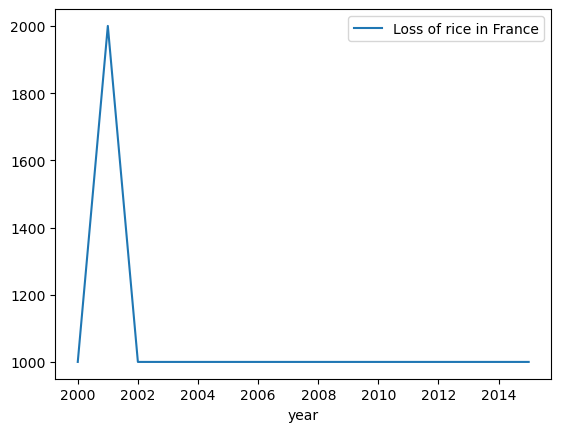

In [178]:
print('France didn\'t lose any apples, but they did loose some "Rice"')
france_rice_df = france_df.loc[(france_df['commodity'] == 'Rice')]
france_rice_df = france_rice_df[['year', 'loss_quantity']]

france_rice_df.plot(x='year', y='loss_quantity')
plt.legend(['Loss of rice in France'])
plt.show()

What type of food was lost the most in France in the last available year?
         commodity  loss_quantity
5437         Wheat       387000.0
5438  Maize (corn)       121000.0
5439          Rice         1000.0
5440       Sorghum         2000.0
5441        Barley       109000.0


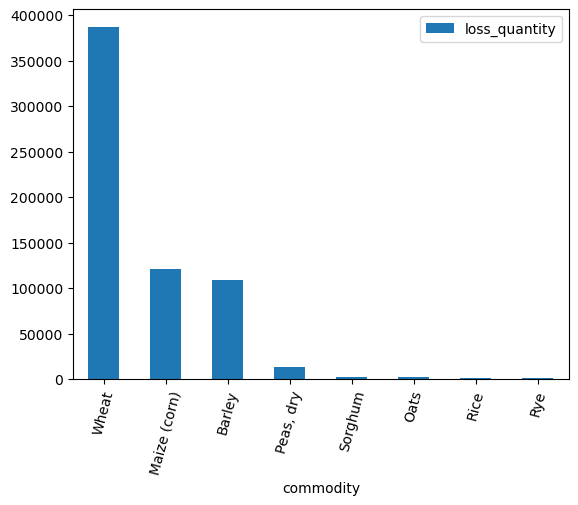

In [179]:
print('What type of food was lost the most in France in the last available year?')
# It looks like they didn't lose anything after 2015
france_loss_df = france_df.loc[(france_df['year'] == 2015)]
france_loss_df = france_loss_df[['commodity', 'loss_quantity']]
print(france_loss_df.head())
france_loss_df = france_loss_df.sort_values(by='loss_quantity', ascending=False)
france_loss_df.plot.bar(x='commodity', y='loss_quantity')
plt.xticks(rotation=75)
plt.show()